# Importing libraries and pre-processing of data

In [1254]:
# add necessary libraries for exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [1255]:
data_path = 'spec_dataset.csv' # path to the data file
df = pd.read_csv(data_path)
df.head(10)

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
0,2021-9301,Ryzen 5,4GB,SSD,500GB,NO,Office
1,2021-9302,Ryzen 5,16GB,SSD,500GB,6GB,GAMING
2,2021-9303,Ryzen 3,4GB,HDD,1TB,NO,Office
3,2021-9304,Ryzen 5,16GB,SSD,1TB,4GB,GAMING
4,2021-9305,Pentium,16GB,HDD,500GB,6GB,Office
5,2021-9306,i7,4GB,SSD,NaN,NO,Office
6,2021-9307,Ryzen 5,4GB,HDD,1TB,NO,Office
7,2021-9308,i9,16GB,SSD,1TB,4GB,GAMING
8,2021-9309,i9,16GB,SSD,500GB,6GB,GAMING
9,2021-9310,Pentium,8GB,HDD,1TB,NO,Office


In [1256]:
df.shape # check the shape of the dataframe

(50, 7)

In [1257]:
df.dtypes # check the data types of the dataframe 

ITEM NO.            object
CPU                 object
RAM                 object
Type of Storage     object
Storage Capacity    object
GPU                 object
Target Usage        object
dtype: object

In [1258]:
df.count() # check the number of non-null values in each column

ITEM NO.            50
CPU                 50
RAM                 49
Type of Storage     49
Storage Capacity    49
GPU                 49
Target Usage        50
dtype: int64

In [1259]:
df.isnull().sum() # check the number of null values in each column

ITEM NO.            0
CPU                 0
RAM                 1
Type of Storage     1
Storage Capacity    1
GPU                 1
Target Usage        0
dtype: int64

In [1260]:
df = df.dropna() # drop all rows with null values   
df.count()

ITEM NO.            46
CPU                 46
RAM                 46
Type of Storage     46
Storage Capacity    46
GPU                 46
Target Usage        46
dtype: int64

In [1261]:
df.describe() # check the summary statistics of the dataframe

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
count,46,46,46,46,46,46,46
unique,46,7,3,2,2,5,2
top,2021-9301,Pentium,4GB,SSD,500GB,NO,Office
freq,1,10,17,29,23,17,24


In [1262]:
df.rename(columns={"GPU ": "GPU"}, inplace=True) # rename the column "GPU " to "GPU"
df["GPU"] = df["GPU"].replace(["4GB ", "6GB "], ["4GB", "6GB"]) # remove the space in the values of the column "GPU"
df["Target Usage"] = df["Target Usage"].replace(["GAMING"], ["Gaming"]) # replace the value "GAMING" with "Gaming" in the column "Target Usage"
df.head(10)

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
0,2021-9301,Ryzen 5,4GB,SSD,500GB,NO,Office
1,2021-9302,Ryzen 5,16GB,SSD,500GB,6GB,Gaming
2,2021-9303,Ryzen 3,4GB,HDD,1TB,NO,Office
3,2021-9304,Ryzen 5,16GB,SSD,1TB,4GB,Gaming
4,2021-9305,Pentium,16GB,HDD,500GB,6GB,Office
6,2021-9307,Ryzen 5,4GB,HDD,1TB,NO,Office
7,2021-9308,i9,16GB,SSD,1TB,4GB,Gaming
8,2021-9309,i9,16GB,SSD,500GB,6GB,Gaming
9,2021-9310,Pentium,8GB,HDD,1TB,NO,Office
10,2021-9311,Ryzen 7,16GB,SSD,500GB,6GB,Gaming


# Exploratory Data Analysis

1. What CPU is mostly used in Gaming? 

In [1263]:
# group by Target Usage and count the number of each CPU used in which target usage is Gaming
Q1 = df.loc[(df["Target Usage"] == "Gaming")].groupby("Target Usage")["CPU"].value_counts().sort_values(ascending=False) 
Q1

Target Usage  CPU    
Gaming        i9         7
              Ryzen 5    4
              Ryzen 7    4
              Ryzen 3    3
              i5         2
              i7         2
Name: CPU, dtype: int64

Text(0.5, 1.0, 'Overall Number of CPUs used for Gaming')

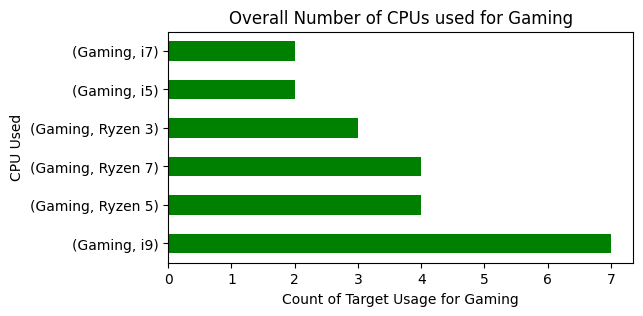

In [1264]:
Q1.plot(kind="barh", color="green" , figsize=(6,3)) # plot the bar chart
plt.xlabel('Count of Target Usage for Gaming')
plt.ylabel('CPU Used')
plt.title('Overall Number of CPUs used for Gaming')

2. How much gigabyte of RAM is usually used by gamers?

In [1265]:
# group by Target Usage and count the number of each RAM size used where the target usage is Gaming
Q2 = df.loc[(df["Target Usage"] == "Gaming")].groupby("Target Usage")["RAM"].value_counts().sort_values(ascending=False)
Q2

Target Usage  RAM 
Gaming        16GB    14
              8GB      8
Name: RAM, dtype: int64

Text(0.5, 1.0, 'Overall RAM Size used for Gaming')

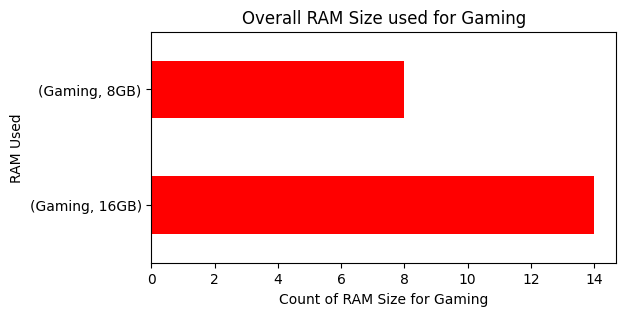

In [1266]:
Q2.plot(kind="barh", color="red" , figsize=(6,3)) # plot the bar chart
plt.xlabel('Count of RAM Size for Gaming')
plt.ylabel('RAM Used')
plt.title('Overall RAM Size used for Gaming')

3. What CPU is mostly used in Office works?

In [1267]:
# group by Target Usage and count the number of CPU used where the target usage is Office
Q3 = df.loc[(df["Target Usage"] == "Office")].groupby("Target Usage")["CPU"].value_counts().sort_values(ascending=False)
Q3

Target Usage  CPU    
Office        Pentium    10
              Ryzen 5     4
              Ryzen 3     2
              Ryzen 7     2
              i5          2
              i7          2
              i9          2
Name: CPU, dtype: int64

Text(0.5, 1.0, 'Overall Number of CPUs used for Office')

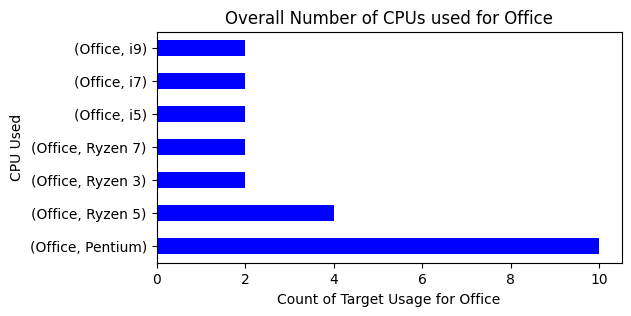

In [1268]:
Q3.plot(kind="barh", color="blue" , figsize=(6,3)) # plot the bar chart
plt.xlabel('Count of Target Usage for Office')
plt.ylabel('CPU Used')
plt.title('Overall Number of CPUs used for Office')

4. Provide an additional analysis or question to answer.

What CPU, RAM, and Type of Storage combination/s are the most popular for Gaming? For Office?

In [1269]:
# group by Target Usage and list the combinations of CPU, RAM, and Type of Storage used where the target usage is Gaming
Q4_1 = df[["CPU", "RAM", "Target Usage", "Type of Storage"]].loc[(df["Target Usage"] == "Gaming")].groupby("Target Usage").value_counts(ascending=False)
Q4_1

Target Usage  CPU      RAM   Type of Storage
Gaming        Ryzen 5  16GB  SSD                4
              i9       16GB  SSD                3
              Ryzen 3  8GB   SSD                2
              Ryzen 7  16GB  SSD                2
                       8GB   SSD                2
              i5       16GB  SSD                2
              i7       8GB   SSD                2
              i9       16GB  HDD                2
                       8GB   SSD                2
              Ryzen 3  16GB  SSD                1
dtype: int64

Text(0.5, 1.0, 'Popularity of PC Spec Combinations for Gaming')

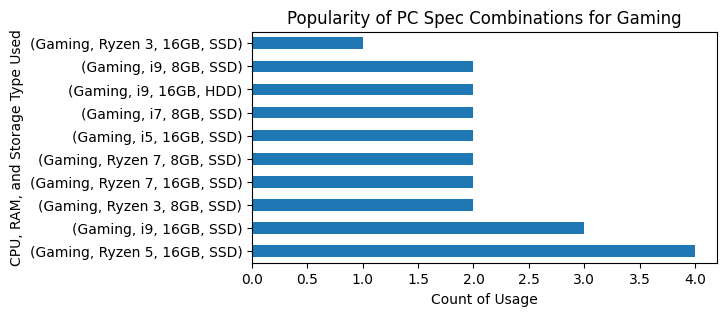

In [1270]:
Q4_1.plot(kind="barh", figsize=(6,3)) # plot the bar chart
plt.xlabel('Count of Usage')
plt.ylabel('CPU, RAM, and Storage Type Used')
plt.title('Popularity of PC Spec Combinations for Gaming')

In [1271]:
# group by Target Usage and list the combinations of CPU, RAM, and Type of Storage used where the target usage is Office
Q4_2 = df[["CPU", "RAM", "Target Usage", "Type of Storage"]].loc[(df["Target Usage"] == "Office")].groupby("Target Usage").value_counts(ascending=False)
Q4_2

Target Usage  CPU      RAM   Type of Storage
Office        Pentium  4GB   HDD                3
                       8GB   HDD                3
                       16GB  HDD                2
              Ryzen 5  4GB   HDD                2
                             SSD                2
              Ryzen 3  4GB   HDD                1
                             SSD                1
              Pentium  8GB   SSD                1
                       16GB  SSD                1
              Ryzen 7  4GB   HDD                1
                             SSD                1
              i5       4GB   HDD                1
                             SSD                1
              i7       4GB   HDD                1
                             SSD                1
              i9       4GB   HDD                1
                             SSD                1
dtype: int64

Text(0.5, 1.0, 'Popularity of PC Spec Combinations for Office')

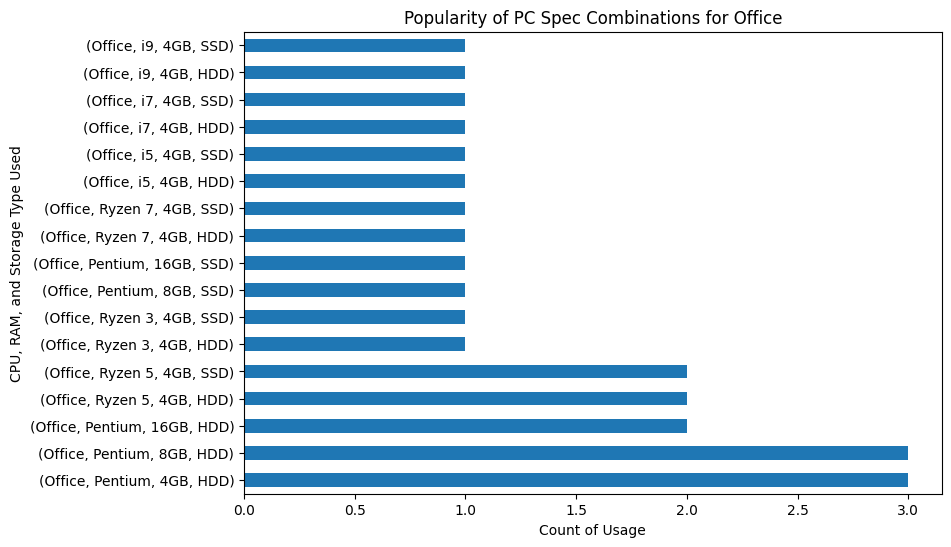

In [1272]:
Q4_2.plot(kind="barh", figsize=(9,6)) # plot the bar chart
plt.xlabel('Count of Usage')
plt.ylabel('CPU, RAM, and Storage Type Used')
plt.title('Popularity of PC Spec Combinations for Office')

## Conclusions

**Question 1: What CPU is mostly used in Gaming?** 
> The CPU used the most for Gaming is the **i9** with 7 items with it dedicated for gaming. This is then followed by **Ryzen 5 and 7** which both have 4 items dedicated for gaming. From these results, it could be seen that Ryzen is more dominant for gaming use but the i9 CPU is also competitive enough to be used for gaming setups.

**Question 2: How much gigabyte of RAM is usually used by gamers?**
> The RAM size mostly to be used by gamers is the **16GB RAM**, with 14 items containing it. Other than 16GB, only **8GB RAM** was discovered to be also used by gamers, with a total of 8 items having it. This result shows that gaming requires high RAM size in order to achieve high performance, with the minimum requirement at current being 8GB. 

**Question 3: What CPU is mostly used in Office works?**
> The CPU mostly used in Office setups is the **Pentium**, with a total of 10 items with it. This is then followed by **Ryzen 5** with a total of 4 items using it. From such, it can be concluded that a low spec CPU such as the Intel Pentium is satisfactory enough for most office work and processes, especially when users are looking for good budget devices for work.

**Question 4: What CPU, RAM, and Type of Storage combination/s are the most popular for Gaming? For Office?**
> The most popular combination in terms of gaming include the **Ryzen 5, 16GB RAM, and an SSD Storage Type**, with a total of 4 items utilizing this combination of specifications. This is then followed the combination of **i9, 16GB RAM, and SSD Storage Type**. From these results, it could be seen that more users use Ryzen 5 over i9 as it can be considered a more budget option but still powerful enough to be used for gaming. However, this also shows that if users could afford it, they would go for a better performing option such as i9. Aside from the processor, gamers prefer the use of 16GB RAM as well as SSD rather than going for a budget setup of 8GB and HDD to increase their game performance and improve loading times.

> In terms of office setups, the most popular combinations include the use of **Pentium processor and HDD Storage Type with 4GB RAM** or a combination with **8GB RAM** instead, with a total of 3 items used with each. This shows that in comparison with gaming setups, office setups have more variation or flexibility, as they have lower spec requirements. Aside from such, more users opt for budget friendly setups since they dont need more expensive, high performing hardware to perform office work.

# Deep Learning Model

## Preprocessing of dataframe values for Deep Learning

In [1273]:
df.head(10)

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
0,2021-9301,Ryzen 5,4GB,SSD,500GB,NO,Office
1,2021-9302,Ryzen 5,16GB,SSD,500GB,6GB,Gaming
2,2021-9303,Ryzen 3,4GB,HDD,1TB,NO,Office
3,2021-9304,Ryzen 5,16GB,SSD,1TB,4GB,Gaming
4,2021-9305,Pentium,16GB,HDD,500GB,6GB,Office
6,2021-9307,Ryzen 5,4GB,HDD,1TB,NO,Office
7,2021-9308,i9,16GB,SSD,1TB,4GB,Gaming
8,2021-9309,i9,16GB,SSD,500GB,6GB,Gaming
9,2021-9310,Pentium,8GB,HDD,1TB,NO,Office
10,2021-9311,Ryzen 7,16GB,SSD,500GB,6GB,Gaming


### Column Value Names and Numerical Equivalent

CPU
> 0 = Pentium, 1 = i5, 2 = i7, 3 = i9, 4 = Ryzen 3, 5 = Ryzen 5, 6 = Ryzen 7

RAM
> 0 - 4GB, 1 - 8GB, 2 - 16GB

Type of Storage
> 0 - SSD, 1 - HDD

Storage Capacity
> 0 - 500GB, 1 - 1TB

GPU
> 0 - NO, 1 - 4GB, 2 - 6GB

Target Usage
> 0 - Gaming, 1 - Office

In [1274]:
# replace non-numerical values with numerical values

df["CPU"] = df["CPU"].replace(["Pentium", "i5", "i7", "i9", "Ryzen 3", "Ryzen 5", "Ryzen 7"], [0, 1, 2, 3, 4, 5, 6])
df["RAM"] = df["RAM"].replace(["4GB", "8GB", "16GB"], [0, 1, 2])
df["Type of Storage"] = df["Type of Storage"].replace(["SSD", "HDD"], [0, 1])
df["Storage Capacity"] = df["Storage Capacity"].replace(["500GB", "1TB"], [0, 1])   
df["GPU"] = df["GPU"].replace(["NO", "4GB", "6GB"], [0, 1, 2])
df["Target Usage"] = df["Target Usage"].replace(["Gaming", "Office"], [0, 1])

df.head(10)

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
0,2021-9301,5,0,0,0,0,1
1,2021-9302,5,2,0,0,2,0
2,2021-9303,4,0,1,1,0,1
3,2021-9304,5,2,0,1,1,0
4,2021-9305,0,2,1,0,2,1
6,2021-9307,5,0,1,1,0,1
7,2021-9308,3,2,0,1,1,0
8,2021-9309,3,2,0,0,2,0
9,2021-9310,0,1,1,1,0,1
10,2021-9311,6,2,0,0,2,0


## Splitting the Data

In [1275]:
from sklearn.model_selection import train_test_split

X = df[["CPU", "RAM", "Type of Storage", "Storage Capacity", "GPU"]].values.reshape(-1,5) # X variable to contain the specifications 
Y = df["Target Usage"] # Y variable to contain the target usage

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [1276]:
X_train.shape, Y_train.shape # check the shape of the training set

((36, 5), (36,))

In [1277]:
X_test.shape, Y_test.shape # check the shape of the testing set

((10, 5), (10,))

## Defining the Model

In [1278]:
# import the necessary libraries for the model
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [1482]:
model = keras.Sequential() # create a sequential model
model.add(layers.Dense(20, input_dim=5, activation='relu')) # add a dense layer with 20 neurons and relu activation function
model.add(layers.Dense(1, activation='sigmoid')) # add an output layer with 1 neuron and sigmoid activation function

## Compiling and Fitting the Model

In [1483]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # compile the model with parameters for binary classification
history = model.fit(X_train, Y_train, validation_split=0.20, epochs=100) # fit the model with the training set

Epoch 1/100
1/1 [==============================] - 1s 633ms/step - loss: 0.9781 - accuracy: 0.5000 - val_loss: 1.1611 - val_accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 0.9637 - accuracy: 0.5000 - val_loss: 1.1416 - val_accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.9497 - accuracy: 0.5000 - val_loss: 1.1225 - val_accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 0.9359 - accuracy: 0.5000 - val_loss: 1.1039 - val_accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 0.9224 - accuracy: 0.5000 - val_loss: 1.0853 - val_accuracy: 0.3750
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.9090 - accuracy: 0.5000 - val_loss: 1.0674 - val_accuracy: 0.3750
Epoch 7/100
1/1 [==============================] - 0s 49ms/step - loss: 0.8960 - accuracy: 0.5000 - val_loss: 1.0500 - val_accuracy: 0.3750
Epoch 8/100
1/1 [==

## Evaluating the Model

In [1484]:
model.evaluate(X_test, Y_test) # evaluate the model with the testing set

1/1 [==============================] - 0s 26ms/step - loss: 0.5230 - accuracy: 0.7000


[0.523011326789856, 0.699999988079071]

In [1485]:
model.evaluate(X_train, Y_train) # evaluate the model with the training set

2/2 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8889


[0.40852445363998413, 0.8888888955116272]

## Saving the Model

In [1486]:
model.save("spec_dataset_model.h5") # save the model

## Confusion Matrix

In [1487]:
import sklearn
from sklearn.metrics import confusion_matrix # import the confusion matrix function
Y_pred = (model.predict(X_test)>0.50).astype("int32") # predict the target usage for the testing set

1/1 [==============================] - 0s 78ms/step


In [1488]:
confusion_matrix(Y_test, Y_pred) # create the confusion matrix, with 10 instances in test data
# 7 correctly classified and 3 incorrectly classified

array([[3, 0],
       [3, 4]], dtype=int64)

## Prediction

In [1489]:
from numpy import array

features = np.array([[5, 2, 0, 0, 2]]) # array of values with a target value of 0 - Gaming
# 5 - Ryzen 5, 2 - 16GB RAM, 0 - SSD, 0 - 500GB Storage, 2 - 6GB GPU

Y_new = (model.predict(features)>0.50).astype("int32") # predict the target usage for the new features
Y_new

1/1 [==============================] - 0s 67ms/step


array([[0]])

In [1490]:
features = np.array([[4, 0, 1, 1, 0]]) # array of values with a target value of 1 - Office
# 4 - Ryzen 3, 0 - 4GB RAM, 1 - HDD, 1 - 1TB Storage, 0 - NO GPU

Pred = keras.models.load_model("spec_dataset_model.h5") # load the model
print((Pred.predict(features)>0.50).astype("int32")) # predict the target usage for the new features

1/1 [==============================] - 0s 86ms/step
[[1]]


## Plotting the Model Training

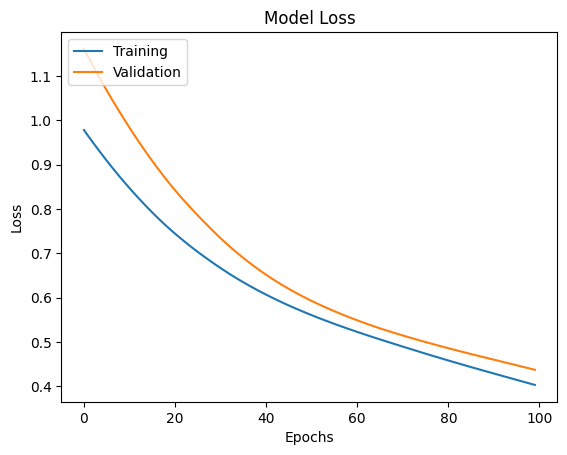

In [1492]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()